# Exercise: Experiment With Activation, Loss, Optimizers, and Regularization    
# Prithvi Poddar (17191)   

In [32]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
mnist_num_classes = 10 
mnist_image_size = 784

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
train_data = train_images.reshape(train_images.shape[0], mnist_image_size)
test_data = test_images.reshape(test_images.shape[0], mnist_image_size)

In [35]:
train_labels = to_categorical(train_labels, mnist_num_classes)
test_labels = to_categorical(test_labels, mnist_num_classes)

In [36]:
def plot_training_history(history, model):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

# Model 1:   
---   

In this model, we will have 3 hidden layers. First layer with 512 nodes, second layer with 256 nodes and third layer with 128 nodes.    
The parameters that we will tune on, will be:   
**Activation function:** 'relu', 'selu', 'tanh', 'elu'      
**Dropout rate:** 0.1, 0.3,  0.5, 0.8     
**Optimizer:** 'adam', 'sgd', 'nadam', 'adadelta'      
**Loss function:** 'categorical_crossentropy', 'binary_crossentropy'   
P.S. We will not be considering sigmoid because in the previous assignment we saw that it suffers from vanishing gradient problem

In [37]:
def get_model_3_layered(activation, dropout_rate):
    model = Sequential()
    model.add(Dense(units = 512, activation=activation, input_shape=(mnist_image_size,)))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units = 256, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units = 128, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=mnist_num_classes, activation=activation))

    return model

First, we iterate through the different activations, by fixing the dropout to 0, optimizer to 'nadam' and loss to 'categorical_crossentropy'    
----

Activation: relu


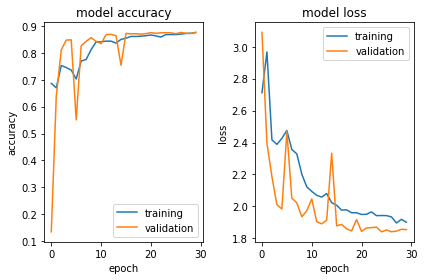

313/313 [==============================] - 0s 2ms/step - loss: 2.0094 - accuracy: 0.8657
Test loss: 2.01
Test accuracy: 0.866
Activation: selu


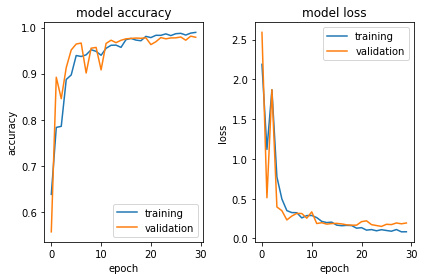

313/313 [==============================] - 1s 2ms/step - loss: 0.2028 - accuracy: 0.9762
Test loss: 0.203
Test accuracy: 0.976
Activation: tanh


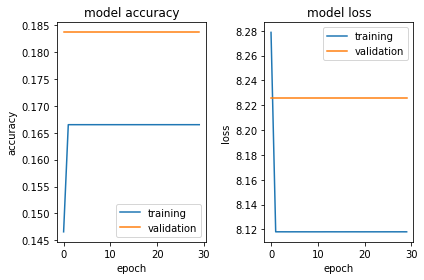

313/313 [==============================] - 1s 2ms/step - loss: 8.1138 - accuracy: 0.1620
Test loss: 8.11
Test accuracy: 0.162
Activation: elu


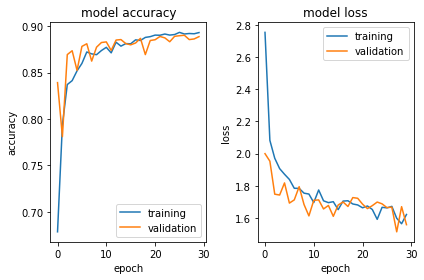

313/313 [==============================] - 1s 2ms/step - loss: 1.6929 - accuracy: 0.8831
Test loss: 1.69
Test accuracy: 0.883


In [ ]:
epochs = 30
batch_size = 32
validation_split = 0.1
dropout_rate = 0.0
activations = ['relu','selu', 'tanh', 'elu']

for activation in activations:
    model = get_model_3_layered(activation, dropout_rate)
    model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Activation: "+str(activation))
    history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
    plot_training_history(history, model)

From the above graphs, we can see that **elu** and **selu** give us the best results.

In the next run, we will use the activations **elu** and **selu** and loop over the optimizers:   
--- 

Activation: elu Optimizer: adam


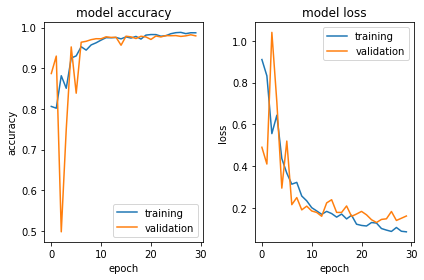

313/313 [==============================] - 1s 2ms/step - loss: 0.1616 - accuracy: 0.9786
Test loss: 0.162
Test accuracy: 0.979
Activation: elu Optimizer: sgd


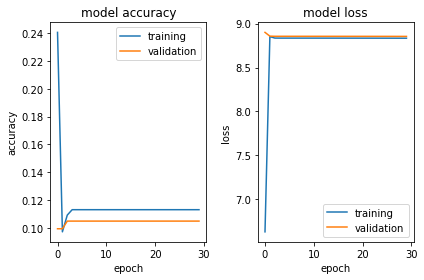

313/313 [==============================] - 1s 2ms/step - loss: 8.7986 - accuracy: 0.1135
Test loss: 8.8
Test accuracy: 0.113
Activation: elu Optimizer: nadam


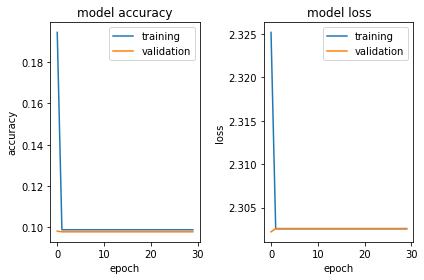

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0980
Test loss: 2.3
Test accuracy: 0.098
Activation: elu Optimizer: adadelta


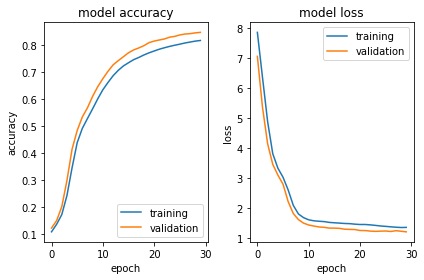

313/313 [==============================] - 1s 2ms/step - loss: 1.3763 - accuracy: 0.8254
Test loss: 1.38
Test accuracy: 0.825
Activation: selu Optimizer: adam


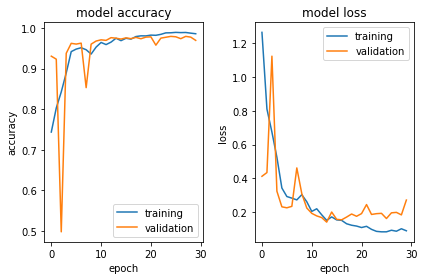

313/313 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.9653
Test loss: 0.305
Test accuracy: 0.965
Activation: selu Optimizer: sgd


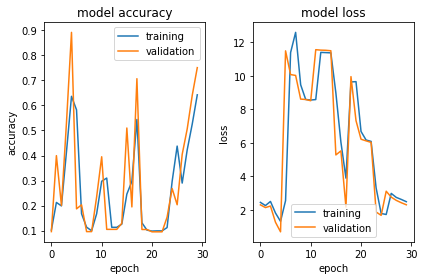

313/313 [==============================] - 1s 2ms/step - loss: 2.3398 - accuracy: 0.7324
Test loss: 2.34
Test accuracy: 0.732
Activation: selu Optimizer: nadam


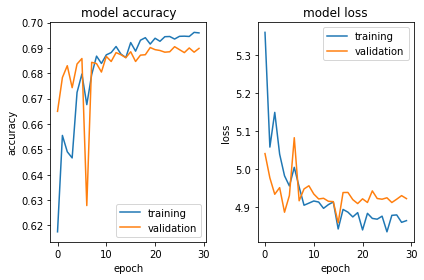

313/313 [==============================] - 1s 2ms/step - loss: 5.0049 - accuracy: 0.6847
Test loss: 5.0
Test accuracy: 0.685
Activation: selu Optimizer: adadelta


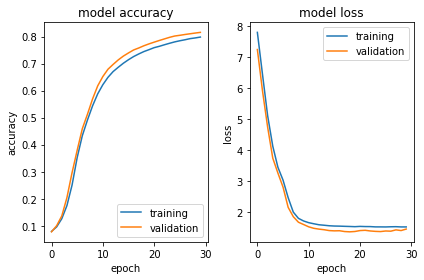

313/313 [==============================] - 1s 2ms/step - loss: 1.4230 - accuracy: 0.8133
Test loss: 1.42
Test accuracy: 0.813


In [ ]:
epochs = 30
batch_size = 32
validation_split = 0.1
dropout_rate = 0.0
activations = ['elu', 'selu']
optimizers = ['adam', 'sgd', 'nadam', 'adadelta']

for activation in activations:
    for optimizer in optimizers:
        model = get_model_3_layered(activation, dropout_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        print("Activation: "+str(activation)+" Optimizer: "+str(optimizer))
        history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
        plot_training_history(history, model)

From the above data, we see that **adadelta and sgd do not perform good**. So we will not consider them in the future runs.

Next, we fix the activation as **selu** and loop over the optimizers: **adam, nadam** and also loop over different dropout_rates:   
---

Activation: selu, Optimizer: adam, Dropout: 0.8


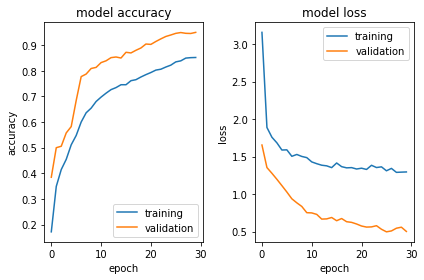

313/313 [==============================] - 1s 2ms/step - loss: 0.6386 - accuracy: 0.9374
Test loss: 0.639
Test accuracy: 0.937
Activation: selu, Optimizer: adam, Dropout: 0.5


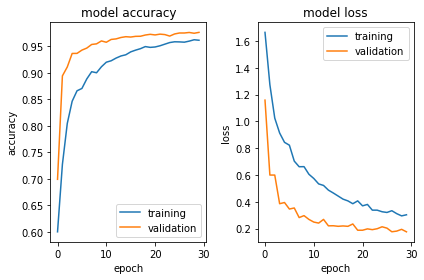

313/313 [==============================] - 1s 2ms/step - loss: 0.2325 - accuracy: 0.9730
Test loss: 0.232
Test accuracy: 0.973
Activation: selu, Optimizer: adam, Dropout: 0.3


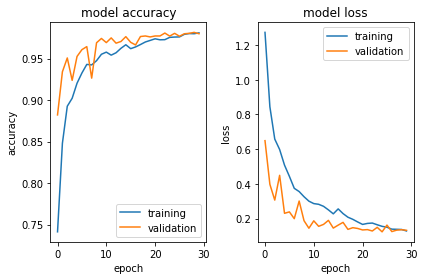

313/313 [==============================] - 1s 2ms/step - loss: 0.1639 - accuracy: 0.9793
Test loss: 0.164
Test accuracy: 0.979
Activation: selu, Optimizer: adam, Dropout: 0.1


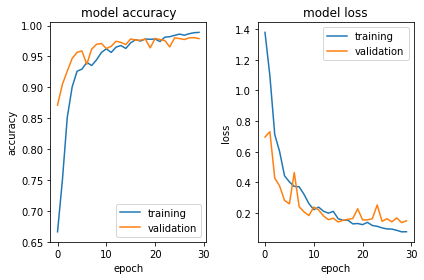

313/313 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9768
Test loss: 0.187
Test accuracy: 0.977
Activation: selu, Optimizer: nadam, Dropout: 0.8


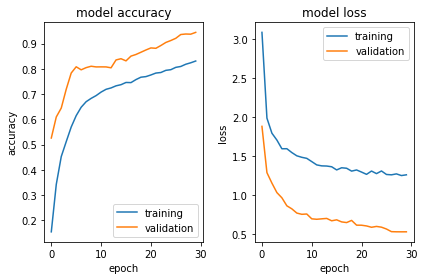

313/313 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.9310
Test loss: 0.681
Test accuracy: 0.931
Activation: selu, Optimizer: nadam, Dropout: 0.5


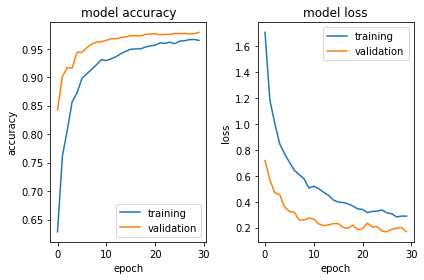

313/313 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9760
Test loss: 0.224
Test accuracy: 0.976
Activation: selu, Optimizer: nadam, Dropout: 0.3


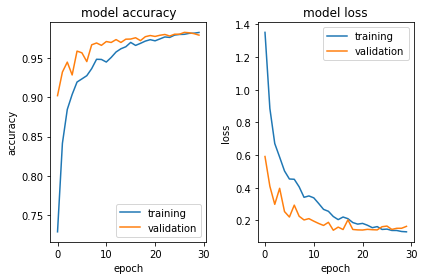

313/313 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.9807
Test loss: 0.179
Test accuracy: 0.981
Activation: selu, Optimizer: nadam, Dropout: 0.1


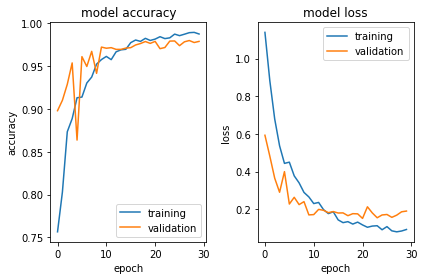

313/313 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9800
Test loss: 0.184
Test accuracy: 0.98


In [ ]:
epochs = 30
batch_size = 32
validation_split = 0.1
dropout_rates = [.8, .5, .3, .1]
activation = 'selu'
optimizers = ['adam', 'nadam']


for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        model = get_model_3_layered(activation, dropout_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        print("Activation: "+str(activation)+", Optimizer: "+str(optimizer)+", Dropout: "+str(dropout_rate))
        history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
        plot_training_history(history, model)

Next, we fix the activation as **elu** and loop over the optimizers: **adam, nadam** and also loop over different dropout_rates:   
---

Activation: elu, Optimizer: adam, Dropout: 0.8


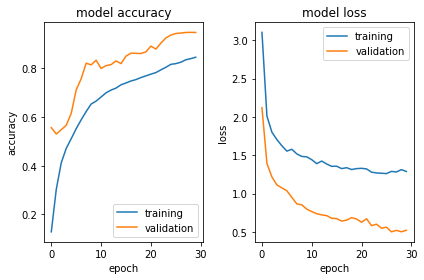

313/313 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.9366
Test loss: 0.68
Test accuracy: 0.937
Activation: elu, Optimizer: adam, Dropout: 0.5


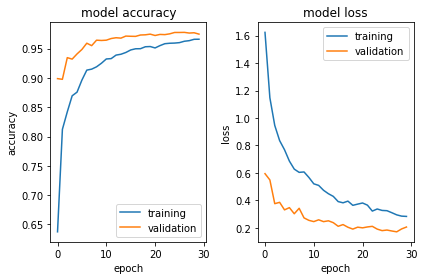

313/313 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.9715
Test loss: 0.263
Test accuracy: 0.971
Activation: elu, Optimizer: adam, Dropout: 0.3


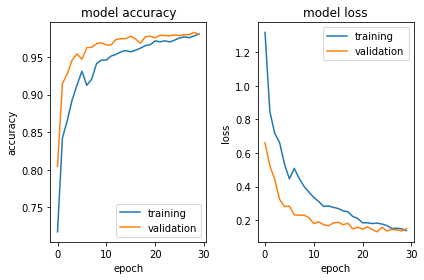

313/313 [==============================] - 0s 1ms/step - loss: 0.1509 - accuracy: 0.9784
Test loss: 0.151
Test accuracy: 0.978
Activation: elu, Optimizer: adam, Dropout: 0.1


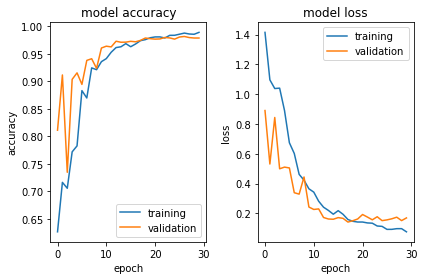

313/313 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9761
Test loss: 0.193
Test accuracy: 0.976
Activation: elu, Optimizer: nadam, Dropout: 0.8


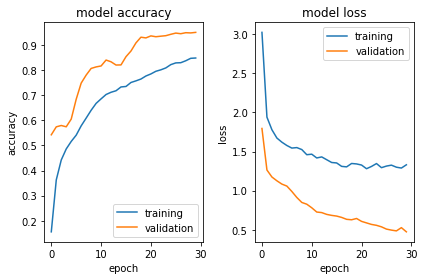

313/313 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.9393
Test loss: 0.626
Test accuracy: 0.939
Activation: elu, Optimizer: nadam, Dropout: 0.5


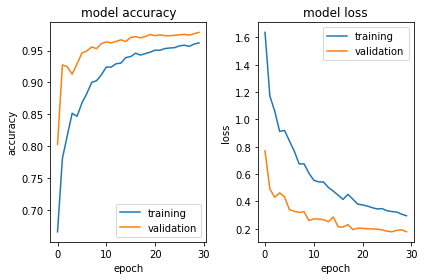

313/313 [==============================] - 1s 2ms/step - loss: 0.2232 - accuracy: 0.9735
Test loss: 0.223
Test accuracy: 0.974
Activation: elu, Optimizer: nadam, Dropout: 0.3


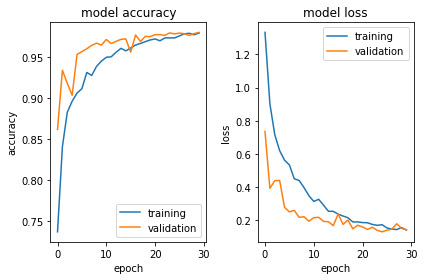

313/313 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9791
Test loss: 0.159
Test accuracy: 0.979
Activation: elu, Optimizer: nadam, Dropout: 0.1
313/313 [==============================] - 0s 1ms/step - loss: 1.8160 - accuracy: 0.8799
Test loss: 1.82
Test accuracy: 0.88


In [ ]:
epochs = 30
batch_size = 32
validation_split = 0.1
dropout_rates = [.8, .5, .3, .1]
activation = 'elu'
optimizers = ['adam', 'nadam']


for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        model = get_model_3_layered(activation, dropout_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        print("Activation: "+str(activation)+", Optimizer: "+str(optimizer)+", Dropout: "+str(dropout_rate))
        history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
        plot_training_history(history, model)

From the above 2 runs, we see that activation: **selu** along with optimizer: **nadam** and dropout rate: **0.3**, gives the best result.

Now we fix the activation, optimizer and dropout rate to **selu, nadam and 0.3**, respectively and try out different loss functions:   
---

Loss: categorical_crossentropy


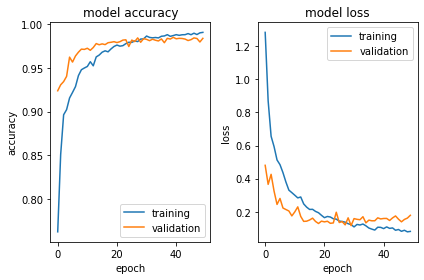

313/313 [==============================] - 1s 2ms/step - loss: 0.1849 - accuracy: 0.9825
Test loss: 0.185
Test accuracy: 0.983
Loss: binary_crossentropy


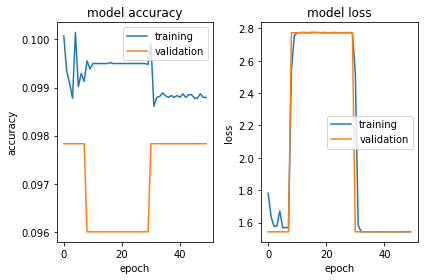

313/313 [==============================] - 1s 2ms/step - loss: 1.5425 - accuracy: 0.0980
Test loss: 1.54
Test accuracy: 0.098


In [38]:
epochs = 50
batch_size = 32
validation_split = 0.1
dropout_rate = 0.3
activation = 'selu'
optimizer = 'nadam'
losses = ['categorical_crossentropy', 'binary_crossentropy']


for loss in losses:
    model = get_model_3_layered(activation, dropout_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    print("Loss: "+str(loss))
    history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
    plot_training_history(history, model)

We see that **categorical crossentropy** give the best result.  

Here we see that using **activation: selu, optimizer: nadam, dropout rate: 0.3 and loss: categorical crossentropy**, we have reached an accuracy of **98.3% on test set**.    

Let us now check that if early stopiing will help increase this result. We will be watching the val_loss value for early stopping:   
---

Loss: categorical_crossentropy


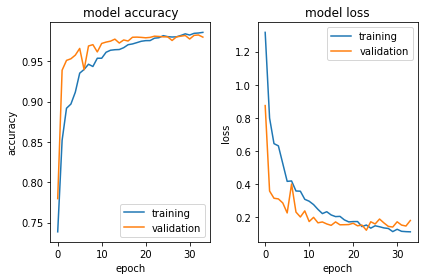

313/313 [==============================] - 1s 2ms/step - loss: 0.1893 - accuracy: 0.9797
Test loss: 0.189
Test accuracy: 0.98


In [39]:
epochs = 100
batch_size = 32
validation_split = 0.1
dropout_rate = 0.3
activation = 'selu'
optimizer = 'nadam'
losses = ['categorical_crossentropy']
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

for loss in losses:
    model = get_model_3_layered(activation, dropout_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    print("Loss: "+str(loss))
    history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split, callbacks=[early_stopping])
    plot_training_history(history, model)

Early stopping also gives similar result with slightly less accuracy of 98% on the test set.

# Model 2:   
---   

In this model, we will have 5 hidden layers with 512, 256, 256, 128, 128 nodes respectively.      
The parameters will be:   
**Activation function:** 'selu'      
**Dropout rate:** 0.8, 0.6, 0.4, 0.2     
**Optimizer:** 'nadam'      
**Loss function:** 'categorical_crossentropy'   
We will check if the model performs better with early stopping or not:

In [40]:
def get_model_5_layered(activation, dropout_rate):
    model = Sequential()
    model.add(Dense(units = 512, activation=activation, input_shape=(mnist_image_size,)))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units = 256, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units = 256, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units = 128, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units = 128, activation=activation))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=mnist_num_classes, activation=activation))

    return model

Dropuout: 0.8


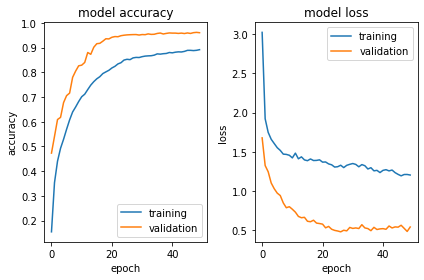

313/313 [==============================] - 1s 2ms/step - loss: 0.6694 - accuracy: 0.9508
Test loss: 0.669
Test accuracy: 0.951
Dropuout: 0.6


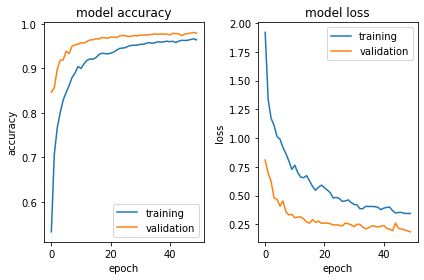

313/313 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.9754
Test loss: 0.276
Test accuracy: 0.975
Dropuout: 0.4


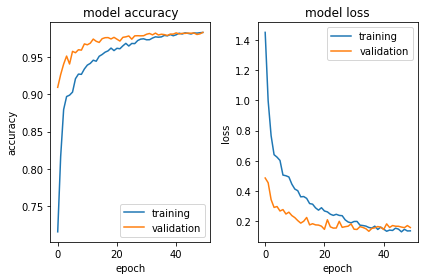

313/313 [==============================] - 1s 2ms/step - loss: 0.1767 - accuracy: 0.9809
Test loss: 0.177
Test accuracy: 0.981
Dropuout: 0.2


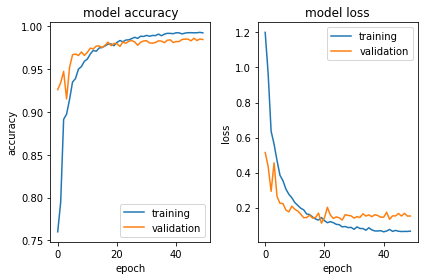

313/313 [==============================] - 1s 2ms/step - loss: 0.1718 - accuracy: 0.9833
Test loss: 0.172
Test accuracy: 0.983


In [41]:
epochs = 50
batch_size = 32
validation_split = 0.1
dropout_rates = [0.8, 0.6, 0.4, 0.2]
activation = 'selu'
optimizer = 'nadam'
loss = 'categorical_crossentropy'

for dropout_rate in dropout_rates:
    model = get_model_3_layered(activation, dropout_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    print("Dropuout: "+str(dropout_rate))
    history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
    plot_training_history(history, model)

Dropuout: 0.8


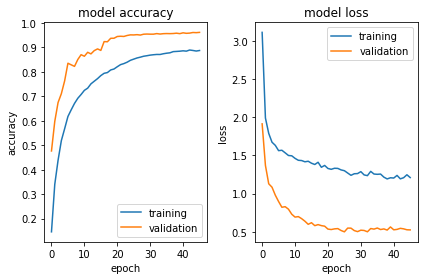

313/313 [==============================] - 1s 2ms/step - loss: 0.6568 - accuracy: 0.9498
Test loss: 0.657
Test accuracy: 0.95
Dropuout: 0.6


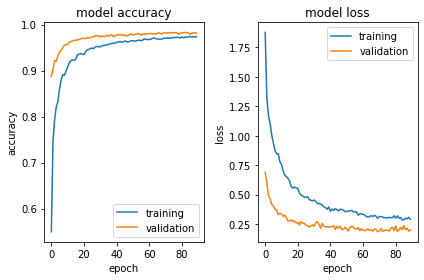

313/313 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.9792
Test loss: 0.268
Test accuracy: 0.979
Dropuout: 0.4


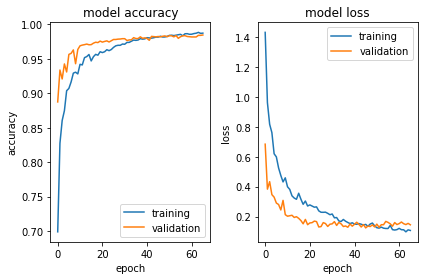

313/313 [==============================] - 1s 2ms/step - loss: 0.1839 - accuracy: 0.9816
Test loss: 0.184
Test accuracy: 0.982
Dropuout: 0.2


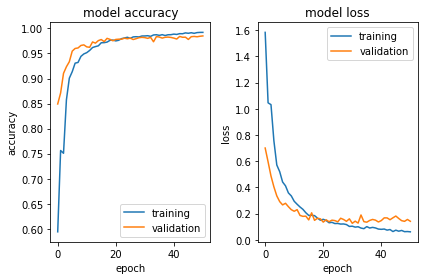

313/313 [==============================] - 1s 2ms/step - loss: 0.1870 - accuracy: 0.9810
Test loss: 0.187
Test accuracy: 0.981


In [42]:
epochs = 100
batch_size = 32
validation_split = 0.1
dropout_rates = [0.8, 0.6, 0.4, 0.2]
activation = 'selu'
optimizer = 'nadam'
loss = 'categorical_crossentropy'
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

for dropout_rate in dropout_rates:
    model = get_model_3_layered(activation, dropout_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    print("Dropuout: "+str(dropout_rate))
    history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split, callbacks=[early_stopping])
    plot_training_history(history, model)

**Hence we find that the 5-layered with activation = selu, optimizer = nadam, dropout = 0.2, loss = categorical crossentropy and with early stopping, performs the best among the 2 models and gives an accuracy of 98.3% on the test set.**